<a href="https://colab.research.google.com/github/Junrulin0225/Netflix-Genre-Classification/blob/main/Netflix_Genre_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re  #pattern matching and text manipulation.
import string
import nltk #a powerful library for working with human language data.
from nltk.corpus import stopwords #for cleaning
from nltk.stem import LancasterStemmer ##for cleaning
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv('Netflix Dataset.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [3]:
df.listed_in.value_counts()

Dramas, International Movies                          362
Documentaries                                         359
Stand-Up Comedy                                       334
Comedies, Dramas, International Movies                274
Dramas, Independent Movies, International Movies      252
                                                     ... 
Kids' TV, TV Action & Adventure, TV Dramas              1
TV Comedies, TV Dramas, TV Horror                       1
Children & Family Movies, Comedies, LGBTQ Movies        1
Kids' TV, Spanish-Language TV Shows, Teen TV Shows      1
Cult Movies, Dramas, Thrillers                          1
Name: listed_in, Length: 514, dtype: int64

In [ ]:
df.listed_in.unique()

In [5]:
df[['primary genre','secondary genre','thrid genre']] = df['listed_in'].str.split(',', expand = True)
df[['primary genre','secondary genre','thrid genre']].head()

,primary genre,secondary genre,thrid genre
0,Documentaries,None,None
1,International TV Shows,TV Dramas,TV Mysteries
2,Crime TV Shows,International TV Shows,TV Action & Adventure
3,Docuseries,Reality TV,None
4,International TV Shows,Romantic TV Shows,TV Comedies


In [6]:
df['primary genre'].value_counts()

Dramas                          1600
Comedies                        1210
Action & Adventure               859
Documentaries                    829
International TV Shows           774
Children & Family Movies         605
Crime TV Shows                   399
Kids' TV                         388
Stand-Up Comedy                  334
Horror Movies                    275
British TV Shows                 253
Docuseries                       221
Anime Series                     176
International Movies             128
TV Comedies                      120
Reality TV                       120
Classic Movies                    80
TV Dramas                         67
Thrillers                         65
Movies                            57
TV Action & Adventure             40
Stand-Up Comedy & Talk Shows      34
Romantic TV Shows                 32
Classic & Cult TV                 22
Anime Features                    21
Independent Movies                20
Music & Musicals                  18
T

In [7]:
# we are only going to pick 5 genres!
df = df[['primary genre','description']]
df.set_index('primary genre', inplace = True)
df.head()

,description
primary genre,
Documentaries,"As her father nears the end of his life, filmm..."
International TV Shows,"After crossing paths at a party, a Cape Town t..."
Crime TV Shows,To protect his family from a powerful drug lor...
Docuseries,"Feuds, flirtations and toilet talk go down amo..."
International TV Shows,In a city of coaching centers known to train I...


In [8]:
genre_to_keep = ['Dramas','Comedies','Action & Adventure','Documentaries','Crime TV Shows']

In [9]:
df = df.loc[genre_to_keep]
df.head()

,description
primary genre,
Dramas,"On a photo shoot in Ghana, an American model s..."
Dramas,After most of her family is murdered in a terr...
Dramas,"As big city life buzzes around them, lonely so..."
Dramas,When his son goes missing during a snowy hike ...
Dramas,Four years after the last deadly shark attacks...


In [10]:
df.reset_index(inplace = True)
df.head()

,primary genre,description
0,Dramas,"On a photo shoot in Ghana, an American model s..."
1,Dramas,After most of her family is murdered in a terr...
2,Dramas,"As big city life buzzes around them, lonely so..."
3,Dramas,When his son goes missing during a snowy hike ...
4,Dramas,Four years after the last deadly shark attacks...


In [11]:
df['primary genre'].value_counts()

Dramas                1600
Comedies              1210
Action & Adventure     859
Documentaries          829
Crime TV Shows         399
Name: primary genre, dtype: int64

<Axes: xlabel='primary genre', ylabel='count'>

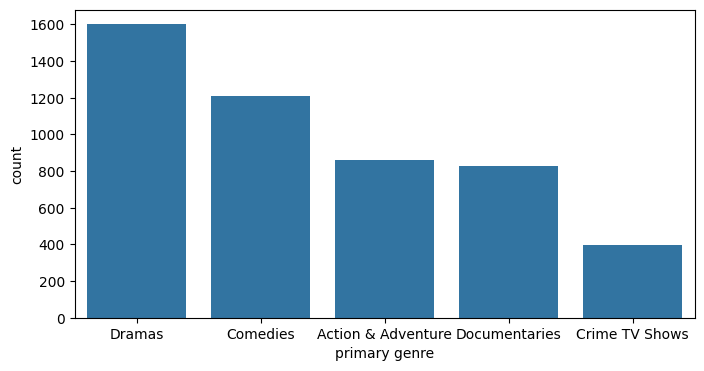

In [12]:
plt.figure(figsize=(8,4))
sns.countplot(data = df, x= 'primary genre')

In [13]:
num_genre = list(df['primary genre'].unique())
num_genre

['Dramas', 'Comedies', 'Action & Adventure', 'Documentaries', 'Crime TV Shows']

In [14]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the genres to numeric values
numeric_genres = label_encoder.fit_transform(num_genre)

# Print the mapping between genres and numeric values
genre_mapping = dict(zip(num_genre, numeric_genres))
genre_mapping

{'Dramas': 4,
 'Comedies': 1,
 'Action & Adventure': 0,
 'Documentaries': 3,
 'Crime TV Shows': 2}

In [15]:
# Convert dictionary to DataFrame
genre_table = pd.DataFrame(list(genre_mapping.items()), columns=['Genre', 'Numeric Value'])
genre_table

,Genre,Numeric Value
0,Dramas,4
1,Comedies,1
2,Action & Adventure,0
3,Documentaries,3
4,Crime TV Shows,2


In [16]:
df['num_genre'] = label_encoder.transform(df['primary genre'])
df.drop(columns = 'primary genre', inplace=True)
df.head()

,description,num_genre
0,"On a photo shoot in Ghana, an American model s...",4
1,After most of her family is murdered in a terr...,4
2,"As big city life buzzes around them, lonely so...",4
3,When his son goes missing during a snowy hike ...,4
4,Four years after the last deadly shark attacks...,4


In [17]:
stemmer = LancasterStemmer()
nltk.download('stopwords')
nltk.download('punkt')
stop_words = set(stopwords.words("english"))

def clean_descrption(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z+]', ' ', text)
    text = ''.join([i for i in text if i not in string.punctuation])
    words = nltk.word_tokenize(text)
    # Use the predefined stop_words variable instead of redefining it inside the function
    text = ' '.join([i for i in words if i not in stop_words])
    return text
df['description'] = df['description'].apply(clean_descrption)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [18]:
df.head()

,description,num_genre
0,photo shoot ghana american model slips back ti...,4
1,family murdered terrorist bombing young woman ...,4
2,big city life buzzes around lonely souls disco...,4
3,son goes missing snowy hike mountains retired ...,4
4,four years last deadly shark attacks police ch...,4


In [19]:
df.to_csv('Description after cleaning.csv')

In [20]:
x = df['description']
y = df['num_genre']

Use TF-IDF to vectorize the data.

In [21]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.25, random_state= 53 )

In [22]:
vectorize =  TfidfVectorizer(stop_words="english", max_df=0.7)
tfidf_train = vectorize.fit_transform(x_train.values)
tfidf_test = vectorize.transform(x_test.values)

In [23]:
def models(tfidf_train, y_train):
  #logistic regression
  from sklearn.linear_model import LogisticRegression
  logis = LogisticRegression(random_state=0).fit(tfidf_train,y_train)
  #decision tree
  from sklearn.tree import DecisionTreeClassifier
  tree = DecisionTreeClassifier(criterion = 'entropy', random_state=0).fit(tfidf_train,y_train)
  #random forest
  from sklearn.ensemble import RandomForestClassifier
  forest = RandomForestClassifier(criterion = 'entropy', random_state=0).fit(tfidf_train,y_train)
  #KNN
  from sklearn.neighbors import KNeighborsClassifier
  neigh = KNeighborsClassifier(n_neighbors=3).fit(tfidf_train,y_train)
  #SVM
  from sklearn import svm
  svm_model = svm.SVC(kernel='linear').fit(tfidf_train,y_train)
  # Naive Bayes
  from sklearn.naive_bayes import MultinomialNB
  nb_classifier = MultinomialNB()
  nb = nb_classifier.fit(tfidf_train, y_train)

  print('[0]score of logistic regression model: ' , logis.score(tfidf_train, y_train))
  print('[1]score of decision tree model: ' , tree.score(tfidf_train, y_train))
  print('[2]score of random forest model: ' , forest.score(tfidf_train, y_train))
  print('[3]score of KNN model: ' , neigh.score(tfidf_train, y_train))
  print('[4]score of SVM model: ' , svm_model.score(tfidf_train, y_train))
  print('[5]score of NB model: ' , nb.score(tfidf_train, y_train))
  return logis, tree, forest, neigh, svm_model, nb

In [24]:
model = models(tfidf_train, y_train)

[0]score of logistic regression model:  0.9109477124183006
[1]score of decision tree model:  1.0
[2]score of random forest model:  1.0
[3]score of KNN model:  0.704248366013072
[4]score of SVM model:  0.9812091503267973
[5]score of NB model:  0.8055555555555556


In [25]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
for i in range(6):
  print()
  print(f'model {i+1}')
  print(classification_report(y_test, model[i].predict(tfidf_test)))
  print(f'accuracy score is {accuracy_score(y_test, model[i].predict(tfidf_test)).round(2)}')


model 1
              precision    recall  f1-score   support

           0       0.67      0.37      0.47       636
           1       0.63      0.36      0.46       929
           2       0.67      0.03      0.05       295
           3       0.89      0.50      0.64       622
           4       0.42      0.86      0.57      1191

    accuracy                           0.52      3673
   macro avg       0.66      0.42      0.44      3673
weighted avg       0.62      0.52      0.49      3673

accuracy score is 0.52

model 2
              precision    recall  f1-score   support

           0       0.30      0.30      0.30       636
           1       0.37      0.30      0.33       929
           2       0.15      0.15      0.15       295
           3       0.56      0.47      0.51       622
           4       0.38      0.46      0.42      1191

    accuracy                           0.37      3673
   macro avg       0.35      0.34      0.34      3673
weighted avg       0.37      0.37   

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [26]:
accuracy_log = accuracy_score(y_test, model[0].predict(tfidf_test)).round(2)
accuracy_tree = accuracy_score(y_test, model[1].predict(tfidf_test)).round(2)
accuracy_random = accuracy_score(y_test, model[2].predict(tfidf_test)).round(2)
accuracy_knn = accuracy_score(y_test, model[3].predict(tfidf_test)).round(2)
accuracy_svm = accuracy_score(y_test, model[4].predict(tfidf_test)).round(2)
accuracy_nb = accuracy_score(y_test, model[5].predict(tfidf_test)).round(2)
dic = {'model': ['logistic', 'decision tree', 'random forest', 'KNN', 'SVM', 'NB'], 'score': [accuracy_log,accuracy_tree,accuracy_random,accuracy_knn,accuracy_svm,accuracy_nb ]}
df = pd.DataFrame(data=dic)
df.set_index('model', inplace=True)
df

,score
model,
logistic,0.52
decision tree,0.37
random forest,0.48
KNN,0.42
SVM,0.54
NB,0.43


<Axes: title={'center': 'Accuracy Across Models'}, xlabel='accurarcy score', ylabel='model'>

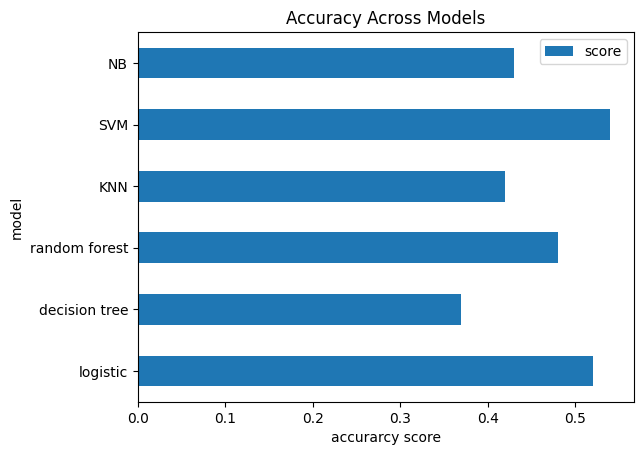

In [27]:
df.plot(kind = 'barh', title= 'Accuracy Across Models', xlabel = 'accurarcy score')

In [28]:
#check from our dataset
x_train.iloc[550]

'disaster prone mr bean sent los angeles guard famous painting unfit physical task everything goes hilariously wrong'

In [29]:
y_train.iloc[550].item()

1

In [33]:
def check_from_dataset(index_number):
  for key,value in genre_mapping.items():
    if value == y_train.iloc[index_number].item():
      print(f"{x_train.iloc[index_number]} is '{key}'")

check_from_dataset(500)

deadly hurricane mile high waves provides perfect cover stealing million u treasury outpost mississippi is 'Action & Adventure'


In [35]:
#input any description!
new_description = input('Enter the description of the Netflix show you like!: ')
def input_description(new_description):

  vectorize =  TfidfVectorizer(stop_words="english", max_df=0.7)
  tfidf_train = vectorize.fit_transform(x_train.values)
  #transform description into numeric
  tfidf_test = vectorize.transform([new_description])

  # time to predict with our medel!
  from sklearn.naive_bayes import MultinomialNB
  nb_classifier = MultinomialNB()
  nb_classifier.fit(tfidf_train, y_train)
  predict_answer = nb_classifier.predict(tfidf_test)

  #instead of printing out the number, we want the genre name
  for key, value in genre_mapping.items():
    if value == predict_answer.item():
      dic = {'Description You Type':new_description, 'genre we predict':key}
      dic_df = pd.DataFrame.from_dict(dic, orient='index')
      dic_df = dic_df.T
  print(dic_df)
  dic_df.to_csv('Output.csv')


input_description(new_description)

Enter the description of the Netflix show you like!: Follows the personal and professional lives of six twenty to thirty year-old friends living in the Manhattan borough of New York City.
                                Description You Type genre we predict
0  Follows the personal and professional lives of...           Dramas
